<font size=5>**Ethics considerations**</font>

The data was taken from opensource, kaggle, with the dataset that was also available on the NIH website. 

The source was throughly checked from both websites, that the data was the same on both sites and that are reliable sources. 

The considerations that we considered were if the data set is big enough and complete, what techniques should we implement for celaning and pre-processing, choosing suitable statistical methods and what modelling methods should we implement.



<font size=5>**Cleaning the data**</font>


We want to display each datasheet and table as a DataFrame such that to be clearer when it's needed to read and to handle the missing values. 


The missing values will also be displayed, and after that we will calculate how much percentage from the data is missing and why, and if there is a way of handling the missing data.


In [45]:
import pandas as pd

file_path = 'Overdose1999-2021.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Iterate over each sheet in the file
for sheet_name, df in sheets_dict.items():
    
    print(f"{sheet_name}")
    display(df)


Rate Drug OD Deaths


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2015-2021 Fold Change,Unnamed: 25
0,Total Overdose Deaths,6.1,6.2,6.8,8.2,8.9,9.4,10.1,11.5,11.9,...,14.7,16.3,19.8,21.7,20.7,21.6,28.3,32.4,2.0,NaN
1,Female,3.9,4.1,4.6,5.8,6.4,6.9,7.3,8.2,8.8,...,11.1,11.8,13.4,14.4,13.6,13.7,17.1,19.6,1.7,NaN
2,Male,8.2,8.3,9.0,10.6,11.5,11.8,12.8,14.8,14.9,...,18.3,20.8,26.2,29.1,27.9,29.6,39.5,45.1,2.2,NaN
3,Any Opioid1,2.9,3.0,3.3,4.1,4.5,4.7,5.1,5.9,6.1,...,9.0,10.4,13.3,14.9,14.6,15.5,21.4,24.7,2.4,2015-2021 Fold Change
4,Female,1.4,1.6,1.9,2.6,2.8,3.1,3.4,3.9,4.3,...,6.3,7.1,8.5,9.4,9.0,9.3,12.3,14.5,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Female,NaN,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.3,0.3,0.3,0.4,0.4,0.5,0.7,0.8,2.7,1
98,Male,NaN,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.2,0.3,0.5,0.4,0.5,0.8,0.8,4.0,1.2
99,Antidepressants WITHOUT Synthetic Opioids othe...,NaN,NaN,0.6,0.7,0.8,0.8,0.8,0.9,1.0,...,1.3,1.2,1.1,1.2,1.1,1.0,1.0,0.9,0.8,1.3
100,Female,NaN,0.6,0.6,0.8,0.8,0.9,0.9,1.1,1.1,...,1.4,1.4,1.4,1.4,1.3,1.2,1.1,1.1,0.8,2.7


Rate Drug OD, 15-24 Years


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,3.2,3.7,4.2,5.1,6.0,6.6,6.9,8.1,8.2,...,8.3,8.6,9.7,12.4,12.6,10.8,11.2,16.7,17.2,1.8
1,Female,1.8,1.9,2.2,2.8,3.1,3.3,3.5,3.9,4.2,...,4.8,5.0,5.9,7.0,7.9,7.1,7.0,9.6,11.0,1.9
2,Male,4.5,5.3,6.1,7.3,8.8,9.6,10.0,12.0,12.0,...,11.7,12.1,13.3,17.5,17.1,14.3,15.2,23.5,23.3,1.8
3,Any Opioid1,1.6,1.9,2.3,2.9,3.4,3.8,4.0,4.9,5.0,...,5.7,6.2,7.0,9.3,9.5,8.4,8.7,14.1,14.6,2.1
4,Female,0.7,0.7,1.0,1.4,1.5,1.6,1.8,2.1,2.3,...,3.0,3.3,4.1,4.9,5.7,5.2,5.1,7.6,8.8,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,NaN,NaN,0.1,0.1,0.2,0.1,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.4,2.0
62,Male,NaN,NaN,0.1,0.1,0.1,0.2,0.2,0.1,0.2,...,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.4,0.4,2.0
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.2,0.2,0.3,0.3,3.0,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.1,NaN,0.1,0.2,0.2,0.2,0.3,3.0


Rate Drug OD by Demographics


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,6.1,6.2,6.8,8.2,8.9,9.4,10.1,11.5,11.9,...,13.8,14.7,16.3,19.8,21.7,20.7,21.6,28.3,32.4,2.0
1,Female,3.9,4.1,4.6,5.8,6.4,6.9,7.3,8.2,8.8,...,10.6,11.1,11.8,13.4,14.4,13.6,13.7,17.1,19.6,1.7
2,Male,8.2,8.3,9.0,10.6,11.5,11.8,12.8,14.8,14.9,...,17.0,18.3,20.8,26.2,29.1,27.9,29.6,39.5,45.1,2.2
3,White (Non-Hispanic),6.2,6.6,7.4,9.2,10.2,11.0,11.8,13.6,14.5,...,17.6,19.0,21.1,25.3,27.5,25.9,26.2,33.1,36.8,1.7
4,Female,4.3,4.5,5.3,6.8,7.5,8.3,8.8,10.0,11.0,...,13.8,14.6,15.8,17.7,19.1,18.0,17.6,21.5,23.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Black (Non-Hispanic),0.1,NaN,NaN,0.1,0.1,0.1,0.2,0.2,0.2,...,0.4,0.5,0.8,1.2,1.6,2.2,2.9,5.1,7.2,9.0
80,Asian* (Non-Hispanic),NaN,0.2,0.2,0.3,0.2,0.3,0.3,0.2,0.3,...,0.5,0.7,0.8,1.0,0.9,1.0,1.4,1.5,NaN,NaN
81,Native Hawaiian or Other Pacific Islander* (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4,6.6,9.0,11.8,NaN,NaN,NaN,NaN,NaN
82,Hispanic,0.2,0.2,0.2,0.3,0.4,0.4,0.5,0.5,0.4,...,0.9,1.0,1.4,1.5,2.0,2.5,3.1,4.7,6.4,4.6


Number Drug OD Deaths 


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2015-2021 Fold Change
0,Total Overdose Deaths,16849,17415,19394,23518,25785,27424,29813,34425,36010,...,43982,47055,52404,63632,70237,67367,70630,91799,106699,2.0
1,Female,5591,5852,6736,8490,9386,10304,11089,12532,13712,...,17183,18243,19447,22074,23685,22426,22749,28071,32398,1.7
2,Male,11258,11563,12658,15028,16399,17120,18724,21893,22298,...,26799,28812,32957,41558,46552,44941,47881,63728,74301,2.3
3,Any Opioid1,8050,8407,9496,11920,12940,13756,14918,17545,18516,...,25052,28647,33091,42249,47600,46802,49860,68630,80411,2.4
4,Female,2057,2264,2767,3760,4138,4643,5161,5945,6581,...,9055,10227,11420,13751,15263,14724,15225,19970,23654,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Female,61,77,79,154,139,164,159,176,203,...,348,437,463,529,692,704,887,1149,1347,2.9
99,Male,61,46,68,84,91,100,119,124,89,...,223,286,345,473,722,719,823,1238,1374,4.0
100,Antidepressants WITHOUT Synthetic Opioids othe...,1627,1675,1870,2132,2282,2494,2583,2833,3133,...,3887,4045,4086,3810,3855,3641,3465,3210,3138,0.8
101,Female,865,907,930,1164,1245,1385,1416,1643,1755,...,2325,2420,2446,2306,2420,2289,2161,1973,1996,0.8


Overdose1999-2021


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1240.0,1435.0,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,346.0,369.0,438.0,560.0,632.0,683.0,733.0,820.0,883.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,894.0,1066.0,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,621.0,728.0,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,141.0,140.0,203.0,269.0,306.0,333.0,371.0,444.0,491.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,NaN,NaN,28.0,28.0,33.0,24.0,33.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,NaN,NaN,26.0,29.0,29.0,41.0,46.0,28.0,55.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [46]:
def check_missing_values(df):
    missing_columns = [col for col in df.columns if df[col].isnull().any()]
    missingvalues_count =df.isna().sum()
    missingValues_df = pd.DataFrame(missingvalues_count.rename('Missing Values')).loc[missingvalues_count.ne(0)]
    missingValues_df['Percentage'] = missingValues_df['Missing Values'] * 100 / df.shape[0]
    return missingValues_df

In [47]:
# Iterate over each sheet in the file
for sheet_name, df in sheets_dict.items():
    print(f"{sheet_name}")
    # print(df.dtypes)
    categorical_features = df.select_dtypes('object').columns
    # print(categorical_features)
    numerical_features= df.select_dtypes('number').columns
    # print(numerical_features)
    num_duplicates = df.duplicated().sum()
    # print("Number of duplicate rows: ", num_duplicates)
    df_dropped = check_missing_values(df)
    display(df_dropped.sort_values(by='Missing Values', ascending=False))
#     Dropping columns having percentage of missing values abobe a threshold
# We try with dropping columns having a 30% (threshold can be adjusted) missing data. The modified dataframe is later stored in a new one (*df_train_dropped_columns*)
    df_train_dropped_columns = df.drop(columns=df.columns[df.isnull().mean() > 0.3])
    print("No. of columns before dropping: ", df.shape[1] )
    print("No. of columns after dropping: ", df_train_dropped_columns.shape[1] )
    print(df.shape[1]- df_train_dropped_columns.shape[1]," columns dropped")

    # Identify which columns were dropped
    dropped_columns = df.columns.difference(df_train_dropped_columns.columns)
    print(dropped_columns)

Rate Drug OD Deaths


,Missing Values,Percentage
1999,35,34.313725
2000,31,30.392157
2001,23,22.549020
2002,18,17.647059
2003,16,15.686275
2004,16,15.686275
2005,16,15.686275
2007,13,12.745098
2008,13,12.745098
2009,13,12.745098


No. of columns before dropping:  26
No. of columns after dropping:  24
2  columns dropped
Index([1999, 2000], dtype='object')
Rate Drug OD, 15-24 Years


,Missing Values,Percentage
1999,26,39.393939
2000,25,37.878788
2001,22,33.333333
2002,19,28.787879
2004,19,28.787879
2003,17,25.757576
2007,17,25.757576
2005,16,24.242424
2006,16,24.242424
2008,16,24.242424


No. of columns before dropping:  25
No. of columns after dropping:  22
3  columns dropped
Index([1999, 2000, 2001], dtype='object')
Rate Drug OD by Demographics


,Missing Values,Percentage
Fold Change 2015 to 2021,23,27.380952
1999,22,26.190476
2000,20,23.809524
2001,18,21.428571
2021,18,21.428571
2002,17,20.238095
2003,17,20.238095
2005,17,20.238095
2004,16,19.047619
2006,16,19.047619


No. of columns before dropping:  25
No. of columns after dropping:  25
0  columns dropped
Index([], dtype='object')
Number Drug OD Deaths 


,Missing Values,Percentage


No. of columns before dropping:  25
No. of columns after dropping:  25
0  columns dropped
Index([], dtype='object')
Overdose1999-2021


,Missing Values,Percentage
1999,23,34.848485
2000,22,33.333333
2001,19,28.787879
2002,19,28.787879
2003,17,25.757576
2004,17,25.757576
2005,16,24.242424
2006,13,19.696970
2007,13,19.696970
2008,12,18.181818


No. of columns before dropping:  25
No. of columns after dropping:  23
2  columns dropped
Index([1999, 2000], dtype='object')


In [48]:
display(df_train_dropped_columns)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [49]:
display(df_train_dropped_columns)


,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


Further, we mde a copy of the dataframe wth the dropeed columns in order not to mess up the other data. Our data consists of a table with category of drugs that caused death, females deaths and males deaths. Thus we move by row and stay on the same column. We move three steps per column, because of how table is built and we check the following cases in order to see if the missing data can be filled: 

**Case 1**

   We have null values for number female, but number of total death for the respective drug is filled, and the number of males deaths is also filled 
   
**Solution** : #female deaths = #total drug overdose death - # males death

**Case 2**

   We have null values for number male, but number of total death for the respective drug is filled, and the number of females deaths is also filled 

**Solution** : #male deaths = #total drug overdose death - # females death

**Case 3**

   We have null values for number total overdose death for respective drug, but number of female death for the respective drug is filled, and the number of males deaths is also filled 

**Solution** : #total drug overdose deaths = #females death + # males death

Thus, if we are in one of this cases we can fill the missing values from the data

In [50]:

df1=df_train_dropped_columns.copy()


for i in range(1, 22):
        for j in range (0,66,3):
                if str(df_train_dropped_columns.iloc[j,i])!= "nan": # category is not null
                        if str(df_train_dropped_columns.iloc[j+1,i])!= "nan": # female is not null
                                if str(df_train_dropped_columns.iloc[j+2,i])=="nan":     #male is null 
                                        if (df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+1,i])>=0:
                                             df1.iloc[j+2,i] = df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+1,i]
                                        else: 
                                             df1.iloc[j+2,i]="NaN"
                        else:
                                if str(df_train_dropped_columns.iloc[j+1,i]) == "nan": # female is null but the category is not 
                                      if str(df_train_dropped_columns.iloc[j+2,i])!="nan":
                                        if (df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+2,i])>=0:
                                            df1.iloc[j+1,i] = df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+2,i]
                                        else :
                                              df1.iloc[j+1,i]="NaN"   
                else : #category is null
                         if str(df_train_dropped_columns.iloc[j+1,i])!= "nan": # female is not null
                                if str(df_train_dropped_columns.iloc[j+2,i])!="nan":# man is not null
                                        if (df_train_dropped_columns.iloc[j+1,i]+ df_train_dropped_columns.iloc[j+2,i] )>=0:
                                          df1.iloc[j,i] = df_train_dropped_columns.iloc[j+1,i]+ df_train_dropped_columns.iloc[j+2,i] #fill with the sum
                                        else :
                                           df1.iloc[j,i]="NaN"

                                           
display(df1)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,12.0,15.0,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,71.0,81.0,86.0,122.0,145.0,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [51]:
ok=1
for i in range (0,23):
    if str(df_train_dropped_columns.iloc[1,i])!= "nan":
        pass
    else:
        ok=0
        break

if (ok==1):
    print("No data missing in total overdosed deaths")
else:
    print("Data missing in total overdose deaths column")

No data missing in total overdosed deaths


Moving on, analysing the data, we can see that sometimes the number of total deaths caused by a specific drug, is smaller than either females death or males deaths. 

Hence, even if we have two of the data filled, we cannot fill in the data. 


In [52]:
count=0
list1=[]
for i in range(1, 22):
        for j in range (0,66,3):
                if str(df1.iloc[j,i])!= "nan": # category is not null
                        if str(df1.iloc[j+1,i])!= "nan" or str(df1.iloc[j+2,i])!="nan":     
                                        if (float(df1.iloc[j+1,i])>float(df1.iloc[j,i])) or (float(df1.iloc[j+2,i])>float(df1.iloc[j,i])):
                                            count=count+1
                                            list1.append(df1.iloc[j,0])
                                            #print(df1.iloc[j,0])
result = [] 
count_dup=0
for i in list1: 
        if i not in result: 
                result.append(i); 
                      
if len(result)>=0:
        print("We have ",len(result),
              " categories where total number of deaths which are either smaller than female deaths or male deaths")
        print()
        for i in range(len(result)):          
                print(result[i])
else:
        print("Everything is alright")


We have  7  categories where total number of deaths which are either smaller than female deaths or male deaths

 Stimulants AND Synthetic Opioids other than Methadone
Cocaine AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Psychostimulants With Abuse Potential AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Heroin AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Antidepressants AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Prescription Opioids AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Benzodiazepines AND Synthetic Opioids other than Methadone (primarily fentanyl) 


Above we can see that we have 7 categories of drugs, together with the name of the drug/medicine, in one of the years,where we have a smaller value in the total number of deaths that a drug caused than number of females/males deaths. 

This may be either a typo in the data by the owner. 

### Time series analysis ###

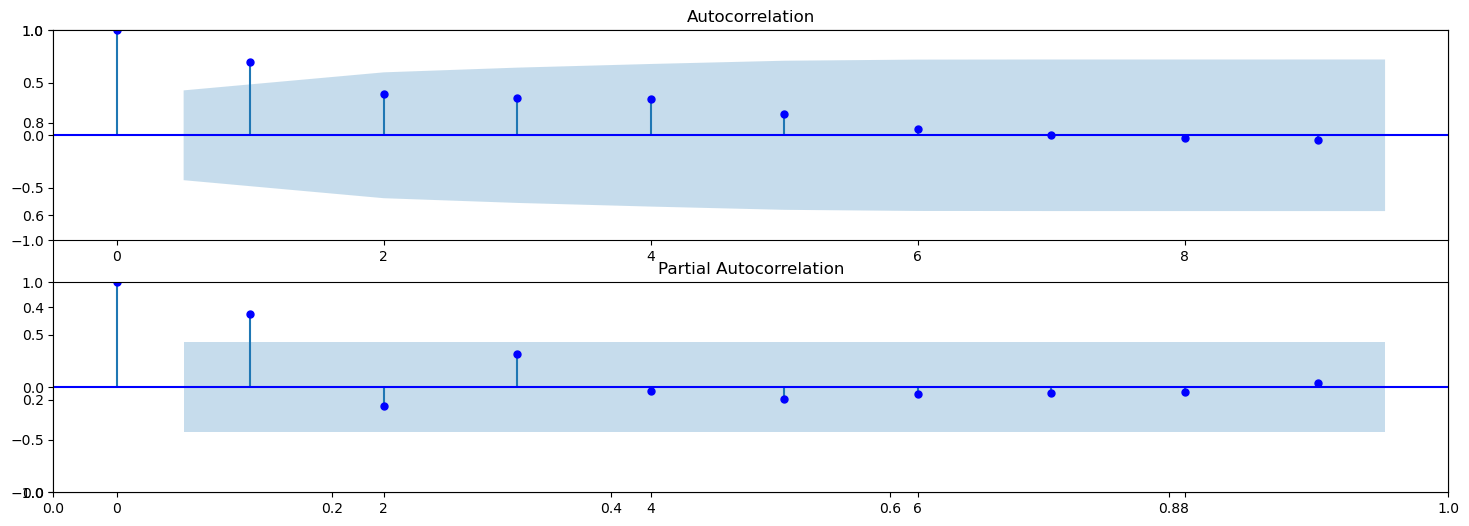

In [53]:
##Technically we should deduce the d p and q from these graphs 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = {
    'Year': list(range(2001, 2022)),
    'Total Overdose Deaths': [1700.0, 2095.0, 2491.0, 2751.0, 2918.0, 3460.0, 3550.0, 3487.0, 3377.0, 3571.0,
                               3762.0, 3518.0, 3664.0, 3798.0, 4235.0, 5376.0, 5455.0, 4633.0, 4777.0, 7095.0, 7426.0]
}

df_covid = pd.DataFrame(data)
df_covid['Year'] = pd.to_numeric(df_covid['Year'], errors='coerce')

# Filter data for years before and after 2020
before_2020 = df_covid[df_covid['Year'] < 2020]
after_2020 = df_covid[df_covid['Year'] >= 2020]
df3=df_covid.T.copy()
fig, ax = plt.subplots(figsize=(18,6))
ax = fig.add_subplot(211)
fig = plot_acf(df3.iloc[1].dropna(), color = "blue", lags=9, ax=ax)
ax = fig.add_subplot(212)
fig = plot_pacf(df3.iloc[1].dropna(), color = "blue", lags=9, ax=ax)
#plt.savefig('images/stochastic-acf-pacf.png');


In [54]:
from statsmodels.tsa.stattools import adfuller

# Running Augmented Dickey-Fuller test on the Total Overdose Deaths to check for stationarity
adf_test = adfuller(df_covid['Total Overdose Deaths'])

# Output the results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
}

adf_result

{'ADF Statistic': -0.5846353351233171,
 'p-value': 0.8744161535087246,
 'Critical Values': {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443}}

The Augmented Dickey-Fuller (ADF) test results provide us with the following information:

**ADF Statistic**: The calculated test statistic is -0.5846.

**p-value**: The p-value is 0.8744.

**Critical Values**: The critical value thresholds for the test statistic at the 1%, 5%, and 10% levels.

To deduce \(d\), which represents the number of differences needed to make the series stationary, we examine the p-value:

If the p-value is less than a threshold (commonly 0.05), we reject the null hypothesis that the series is non-stationary, meaning no differencing is needed, so \(d=0\).
If the p-value is greater than the threshold, we fail to reject the null hypothesis, meaning the series is non-stationary, and differencing is needed.

In this case, the p-value is 0.8744, which is much higher than 0.05, suggesting that the series is non-stationary. Therefore, we would need to difference the series to achieve stationarity.

To determine \(d\), we start with \(d=1\) and conduct the ADF test again on the first-differenced series. If the series is still non-stationary, we increment \(d\) and test again until we find a stationary series.


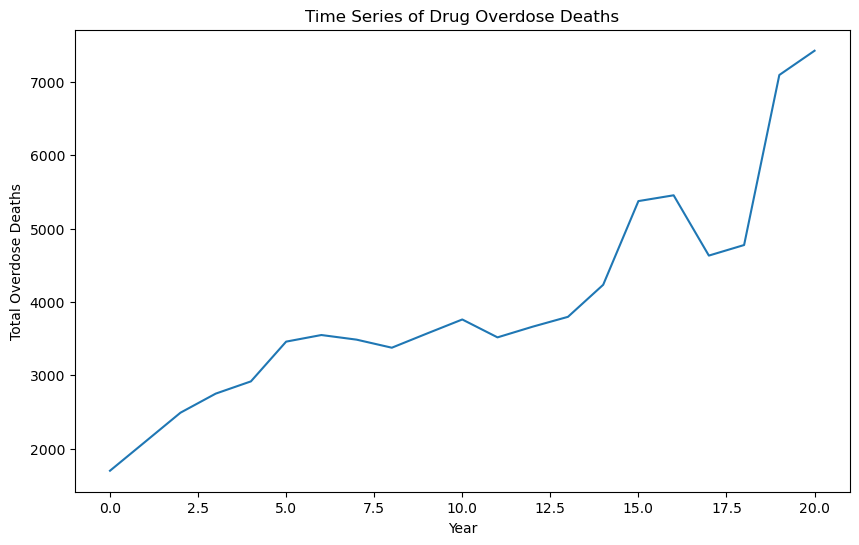

ADF Statistic: -0.5846353351233171
p-value: 0.8744161535087246


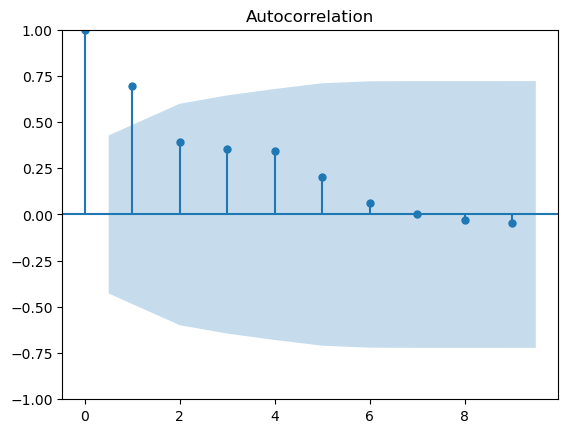

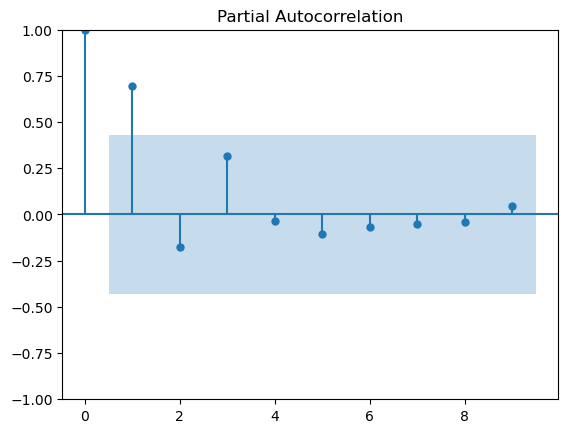

                                 SARIMAX Results                                 
Dep. Variable:     Total Overdose Deaths   No. Observations:                   21
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -156.167
Date:                   Mon, 25 Mar 2024   AIC                            318.333
Time:                           16:57:13   BIC                            321.320
Sample:                                0   HQIC                           318.916
                                    - 21                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3066      1.259     -0.243      0.808      -2.775       2.162
ma.L1          0.7960      1.333      0.597      0.551      -1.817       3.409
sigma2      3.491e+05   7.48

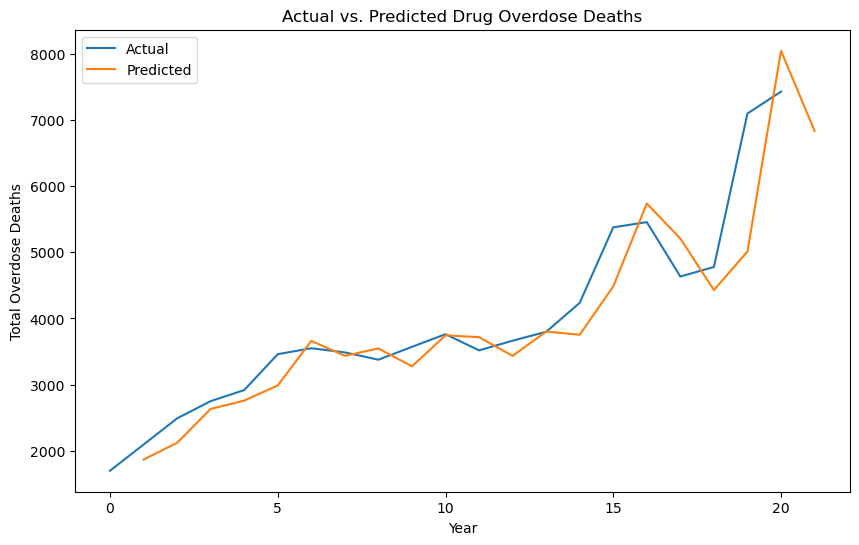

Mean Squared Error: 84874.54015525796
Forecasted values: 21    6832.980138
22    7014.779224
23    6959.046002
24    6976.131852
25    6970.893930
26    6972.499693
27    6972.007423
28    6972.158335
29    6972.112071
30    6972.126254
31    6972.121906
32    6972.123239
33    6972.122830
34    6972.122956
35    6972.122917
36    6972.122929
37    6972.122925
38    6972.122926
39    6972.122926
40    6972.122926
Name: predicted_mean, dtype: float64


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the time series data of drug overdose deaths
# Assuming df_covid is your DataFrame with the provided data
# Ensure 'Year' is set as the index of the DataFrame
# Convert 'Total Overdose Deaths' to a time series object if not already
data = {
    'Year': list(range(2001, 2022)),
    'Total Overdose Deaths': [1700.0, 2095.0, 2491.0, 2751.0, 2918.0, 3460.0, 3550.0, 3487.0, 3377.0, 3571.0,
                               3762.0, 3518.0, 3664.0, 3798.0, 4235.0, 5376.0, 5455.0, 4633.0, 4777.0, 7095.0, 7426.0]
}

df_covid = pd.DataFrame(data)
df_covid['Year'] = pd.to_numeric(df_covid['Year'], errors='coerce')

# Filter data for years before and after 2020
before_2020 = df_covid[df_covid['Year'] < 2020]
after_2020 = df_covid[df_covid['Year'] >= 2020]
ts_data = df_covid['Total Overdose Deaths']

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts_data)
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.title('Time Series of Drug Overdose Deaths')
plt.show()
i
# Perform Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(ts_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Plot ACF and PACF to identify ARIMA parameters
plot_acf(ts_data, lags=9)
plot_pacf(ts_data, lags=9)
plt.show()

# Define ARIMA parameters based on ACF and PACF plots
p = 1# AutoRegressive (AR) order
d = 1# Integrated (I) order
q = 1 # Moving Average (MA) order

# Fit ARIMA model
arima_model = ARIMA(ts_data, order=(p, d, q))
arima_result = arima_model.fit()

# Get summary of ARIMA model
print(arima_result.summary())

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Actual')
plt.plot(arima_result.predict(start=1, end=len(ts_data)), label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.title('Actual vs. Predicted Drug Overdose Deaths')
plt.legend()
plt.show()

# Evaluate ARIMA model performance
mse = mean_squared_error(ts_data, arima_result.predict(start=1, end=len(ts_data)))
print('Mean Squared Error:', mse)

# Forecast future values
forecast_steps = 20  # Number of steps to forecast
forecast = arima_result.forecast(steps=forecast_steps)
print('Forecasted values:', forecast)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

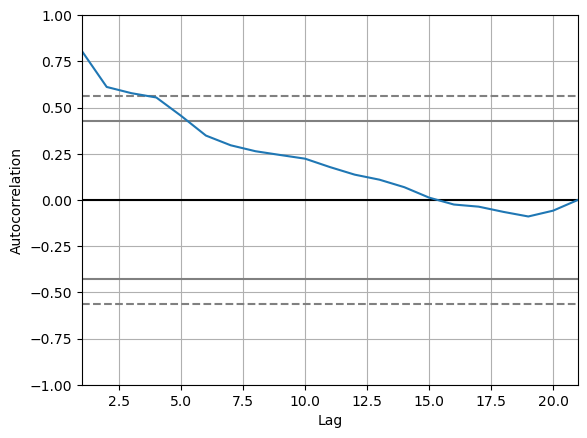

In [56]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(df_covid)

In [57]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Differencing the series once to make it stationary
df_covid['Differenced'] = df_covid['Total Overdose Deaths'].diff().dropna()

# Check stationarity again after differencing
adf_test_diff = adfuller(df_covid['Differenced'].dropna())

# Fit ARIMA model on the data up to 2019 (before COVID-19)
# The d value is 1 as we differenced the series once
# Initial values for p and q are taken as 1 based on ACF and PACF plots
model = ARIMA(df_covid[df_covid['Year'] < 2020]['Total Overdose Deaths'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next years (which include the COVID-19 period)
forecast_years = df_covid[df_covid['Year'] >= 2020]['Year']
forecast = model_fit.get_forecast(steps=len(forecast_years))
forecast_values = forecast.summary_frame()['mean']

# Combine actual and forecasted values
df_forecast = pd.DataFrame({
    'Year': forecast_years,
    'Forecasted Overdose Deaths': forecast_values.values,
    'Actual Overdose Deaths': df_covid[df_covid['Year'] >= 2020]['Total Overdose Deaths'].values
})

df_forecast['Residuals'] = df_forecast['Actual Overdose Deaths'] - df_forecast['Forecasted Overdose Deaths']

adf_test_diff, df_forecast

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


((-3.722065543595204,
  0.0038132730939037436,
  8,
  11,
  {'1%': -4.223238279489106,
   '5%': -3.189368925619835,
   '10%': -2.729839421487603},
  143.56131011118347),
     Year  Forecasted Overdose Deaths  Actual Overdose Deaths    Residuals
 19  2020                 5082.310057                  7095.0  2012.689943
 20  2021                 5018.477182                  7426.0  2407.522818)

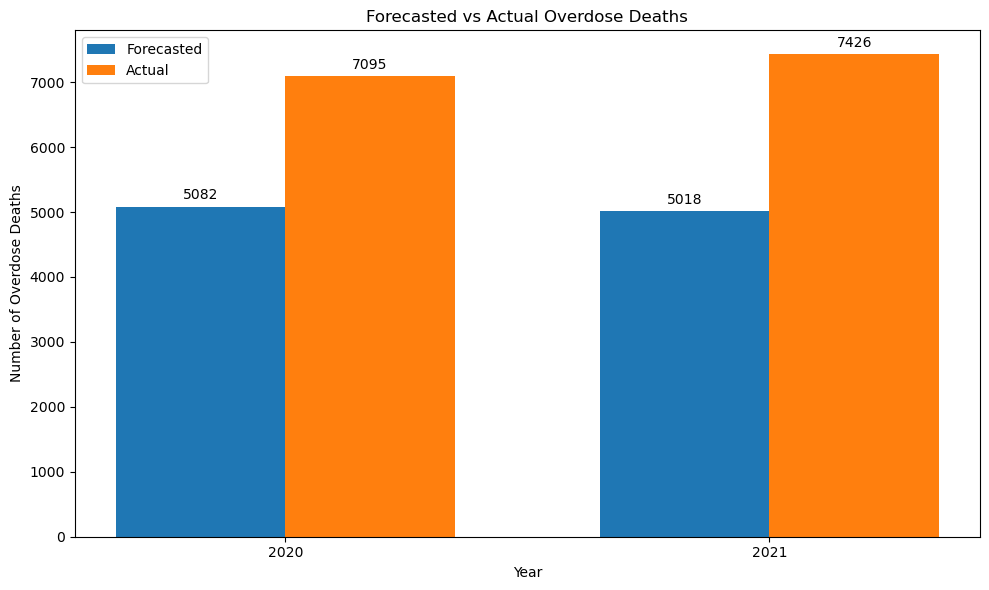

In [58]:

bar_width = 0.35
index = np.arange(len(df_forecast['Year']))

fig, ax = plt.subplots(figsize=(10, 6))
forecasted_bars = ax.bar(index, df_forecast['Forecasted Overdose Deaths'], bar_width, label='Forecasted')
actual_bars = ax.bar(index + bar_width, df_forecast['Actual Overdose Deaths'], bar_width, label='Actual')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Overdose Deaths')
ax.set_title('Forecasted vs Actual Overdose Deaths')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_forecast['Year'])
ax.legend()

# Adding the text for the labels on each bar
for bar in forecasted_bars + actual_bars:
    height = bar.get_height()
    ax.annotate('{}'.format(int(height)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

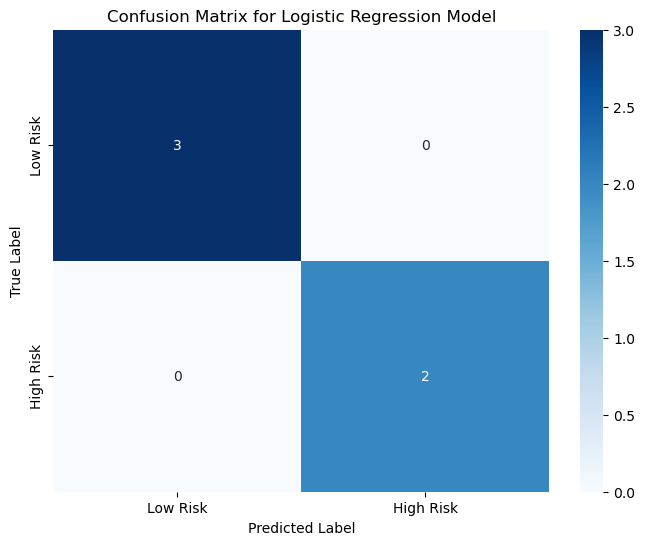

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate the median as the threshold for high/low risk
median_threshold = df_covid['Total Overdose Deaths'].median()

# Classify each year as 0 (low risk) or 1 (high risk)
df_covid['Risk_Classification'] = (df_covid['Total Overdose Deaths'] > median_threshold).astype(int)

# Prepare the data for logistic regression
X = df_covid[['Year']]  # Predictor
y = df_covid['Risk_Classification']  # Response

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#conf_matrix, class_report

# Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Low Risk', 'High Risk'], 
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In the logistic regression model and its evaluation, the dataset was split into training and testing sets with a test size of 20% of the total dataset. Given that the dataset spans 21 years (from 2001 to 2021), approximately 20% of this would be around 4 to 5 years used for testing. The specific output from the code indicates that 5 years were classified in the test set, as shown by the size of the confusion matrix and the classification report.

The confusion matrix shows perfect classification with 3 low-risk and 2 high-risk observations correctly classified.
The classification report indicates that both precision and recall are 1.00 for both classes, leading to an F1-score of 1.00 across the board. This means the model accurately identified all test cases.
This result suggests that the year alone can be a strong predictor for classifying the risk level of overdose deaths in this dataset. However, it's important to note a few things:

The perfect score might not generalize well to unseen data or more complex scenarios, especially with a small dataset.
The model's performance is partly due to the clear trend in overdose deaths over the years, with more recent years being more likely classified as high-risk due to increasing numbers of deaths.
Logistic regression here uses the year as the sole predictor, simplifying the real-world factors that contribute to overdose risk.

The visualization of the confusion matrix provides a clear and straightforward summary of the performance of the logistic regression model on the test set. Here's a detailed analysis of what this visualization tells us:

1. *Accuracy*:
   - The model achieved 100% accuracy on the test set, as indicated by the correct classification of all test instances into their respective categories (Low Risk and High Risk).

2. *True Positives (TP) and True Negatives (TN)*:
   - True Positives: The model correctly predicted 2 instances as High Risk (bottom right corner of the matrix).
   - True Negatives: The model correctly predicted 3 instances as Low Risk (top left corner of the matrix).

3. *False Positives (FP) and False Negatives (FN)*:
   - False Positives: There were no instances where the model incorrectly predicted Low Risk as High Risk (top right corner is zero).
   - False Negatives: There were no instances where the model incorrectly predicted High Risk as Low Risk (bottom left corner is zero).

4. *Precision, Recall, and F1-Score*:
   - Precision: The model has a precision of 1.00 for both Low Risk and High Risk categories, meaning that all the predictions made by the model for each category were correct.
   - Recall: The recall is also 1.00 for both categories, indicating that the model was able to identify all actual instances of each category correctly.
   - F1-Score: The F1-score, which is the harmonic mean of precision and recall, is 1.00 for both categories, reflecting the model's perfect precision and recall.

5. *Interpretation*:
   - The confusion matrix and the classification report together indicate that the logistic regression model performed exceptionally well on this particular test set. It successfully distinguished between Low Risk and High Risk years for overdose deaths with complete accuracy.
   - While the model's performance is excellent, it's important to consider the context and complexity of the data, as well as the size and representativeness of the training and testing sets. A model performing with 100% accuracy is rare in real-world scenarios and could indicate overfitting, especially if the test set is small or not representative of the broader data. 

In summary, the visualization and the associated metrics suggest that the logistic regression model accurately classified the years into Low Risk and High Risk for overdose deaths. However, further validation with a larger or more diverse dataset might be necessary to fully assess the model's generalizability and robustness.

In [60]:
import pandas as pd

# Assuming demo_df is already loaded and demo_df_long is created as before
demo_df = pd.read_excel("Count_by_demo.xlsx")
# Identify the index of the first occurrence of "Any Opioid1" or similar categories
end_index = demo_df[demo_df['Year'].str.contains("Any Opioid", na=False)].index.min()

# Filter the DataFrame to keep only rows before the identified index, ensuring we only have total deaths
demo_df_filtered = demo_df.loc[:end_index-1].copy()

# Convert the filtered dataset to a long format
demo_df_long_filtered = pd.melt(demo_df_filtered, id_vars=['Year'], var_name='Year_Num', value_name='Death_Count')

# Extract demographic information from the 'Year' column for the filtered dataset
demo_df_long_filtered['Demographic'] = demo_df_long_filtered['Year'].apply(lambda x: x.split()[0]).copy()

# Filter out rows for 'Fold Change 2015 to 2021' and ensure 'Year_Num' is numeric, handling warnings properly
demo_df_long_filtered = demo_df_long_filtered[demo_df_long_filtered['Year_Num'].apply(lambda x: str(x).isnumeric())].copy()
demo_df_long_filtered['Year_Num'] = demo_df_long_filtered['Year_Num'].astype(int)

# Convert 'Death_Count' to numeric, handling non-numeric values properly
demo_df_long_filtered['Death_Count'] = pd.to_numeric(demo_df_long_filtered['Death_Count'], errors='coerce')
demo_df_long_filtered.dropna(subset=['Death_Count'], inplace=True)

# Display the first few rows to verify
print(demo_df_long_filtered.head(35))

                                                 Year  Year_Num  Death_Count  \
0                               Total Overdose Deaths      1999          6.1   
1                                              Female      1999          3.9   
2                                                Male      1999          8.2   
3                                White (Non-Hispanic)      1999          6.2   
4                                              Female      1999          4.3   
5                                                Male      1999          8.0   
6                                Black (Non-Hispanic)      1999          7.5   
7                                              Female      1999          4.0   
8                                                Male      1999         11.5   
15                                           Hispanic      1999          5.4   
16                                             Female      1999          2.2   
17                                      

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Death_Count']),  # Normalize death counts
        ('cat', OneHotEncoder(), ['Demographic'])    # Encode demographic categories
    ])

# Define the K-Means clustering model within a pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Adjust n_clusters as needed
])

# Prepare the features for clustering
features = demo_df_long_filtered[['Demographic', 'Death_Count']]

# Apply the clustering pipeline
demo_df_long_filtered['Cluster'] = kmeans_pipeline.fit_predict(features)

# Analyze the cluster assignments
cluster_counts = demo_df_long_filtered['Cluster'].value_counts()
print(cluster_counts)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
1    197
2    119
0     50
Name: count, dtype: int64


In [62]:
# Assuming 'Cluster' labels are already in 'demo_df_long_filtered'

# Group the data by cluster and demographic, and count the number of entries in each group
cluster_demographic_composition = demo_df_long_filtered.groupby(['Cluster', 'Demographic']).size().unstack(fill_value=0)

# Calculate the percentage of each demographic category within each cluster
cluster_demographic_composition_pct = cluster_demographic_composition.div(cluster_demographic_composition.sum(axis=1), axis=0) * 100

print("Cluster Demographic Composition (Counts):")
print(cluster_demographic_composition)
print("\nCluster Demographic Composition (Percentages):")
print(cluster_demographic_composition_pct)

Cluster Demographic Composition (Counts):
Demographic  American  Asian*  Black  Female  Hispanic  Male  Native  Total  \
Cluster                                                                       
0                   6       0      3       2         0    31       0      2   
1                  17       4     20       0        22    92       4     21   
2                   0       0      0     119         0     0       0      0   

Demographic  White  
Cluster             
0                6  
1               17  
2                0  

Cluster Demographic Composition (Percentages):
Demographic   American    Asian*      Black  Female   Hispanic       Male  \
Cluster                                                                     
0            12.000000  0.000000   6.000000     4.0   0.000000  62.000000   
1             8.629442  2.030457  10.152284     0.0  11.167513  46.700508   
2             0.000000  0.000000   0.000000   100.0   0.000000   0.000000   

Demographic    Native  

In [63]:
multiples_of_three_df = df1.loc[df1.index % 3 == 0]
multiples_of_three_df2=multiples_of_three_df.iloc[2:].reset_index(drop=True)
display(multiples_of_three_df2)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Prescription Opioids2,489.0,641.0,833.0,1031.0,1058.0,1388.0,1536.0,1449.0,1406.0,...,988.0,931.0,886.0,1146.0,1050.0,790.0,672.0,812.0,655.0,0.7
1,Prescription Opioids AND Synthetic Opioids oth...,21.0,31.0,28.0,31.0,52.0,41.0,55.0,58.0,65.0,...,81.0,171.0,289.0,364.0,352.0,332.0,480.0,414.0,2.4,NaN
2,Synthetic Opioids other than Methadone (primar...,54.0,84.0,107.0,121.0,130.0,278.0,175.0,190.0,203.0,...,237.0,514.0,999.0,1958.0,2655.0,2640.0,3040.0,5393.0,5936.0,5.9
3,Heroin4,212.0,241.0,259.0,263.0,279.0,313.0,359.0,497.0,510.0,...,1263.0,1452.0,1649.0,1728.0,1454.0,1160.0,876.0,711.0,360.0,0.2
4,Heroin AND Synthetic Opioids other than Methad...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,131.0,...,623.0,525.0,474.0,245.0,0.8,623.0,525.0,474.0,245.0,NaN
5,Stimulants5a,364.0,492.0,607.0,634.0,710.0,789.0,674.0,500.0,395.0,...,549.0,635.0,826.0,1275.0,1587.0,1497.0,1609.0,2199.0,2472.0,3.0
6,Stimulants AND Any Opioid,189.0,251.0,301.0,343.0,404.0,476.0,411.0,334.0,271.0,...,349.0,457.0,589.0,936.0,1208.0,1170.0,1223.0,1827.0,2067.0,3.5
7,Stimulants AND Synthetic Opioids other than M...,23.0,61.0,24.0,26.0,26.0,15.0,22.0,13.0,24.0,...,774.0,843.0,971.0,1599.0,1945.0,12.3,1398.0,1146.0,1945.0,NaN
8,Cocaine5,280.0,388.0,475.0,507.0,546.0,676.0,563.0,384.0,269.0,...,273.0,334.0,442.0,757.0,924.0,859.0,850.0,1089.0,1157.0,2.6
9,Cocaine AND Any Opioid,167.0,223.0,266.0,312.0,345.0,424.0,365.0,280.0,208.0,...,222.0,280.0,385.0,641.0,792.0,751.0,743.0,988.0,1039.0,2.7


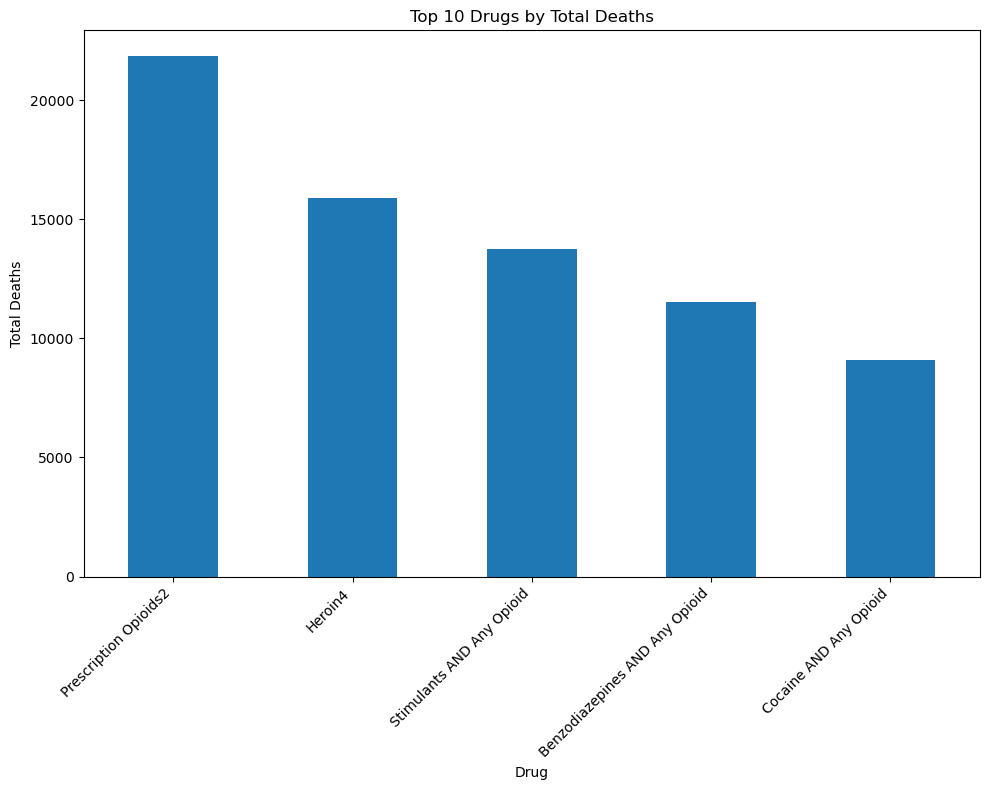

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# df2 is your DataFrame after making a copy of df1 and applying initial filtering

# Convert all columns except the first one from strings to numeric values
for col in multiples_of_three_df2.columns[1:]:  # Assuming the first column is 'Year' or 'Drug Name'
    multiples_of_three_df2[col] = pd.to_numeric(multiples_of_three_df2[col], errors='coerce')

# Now, let's focus on the drugs only, skipping "Total Overdose Deaths" and "Any Opioid1"
# Assuming these entries are at the beginning and not part of the 3-row cycle
# If you've already filtered them out as shown previously, you can proceed directly

# Select every third row starting from the first drug entry
drugs_only = multiples_of_three_df2.iloc[::3, :]

# Aggregate the total deaths for each drug across all years
drugs_total_deaths = drugs_only.iloc[:, 1:].sum(axis=1)

# Add drug names back for labeling
drugs_total_deaths.index = drugs_only.iloc[:, 0]  # Assuming the first column contains drug names

# Sort the aggregated deaths to identify the drugs with the most deaths
sorted_deaths = drugs_total_deaths.sort_values(ascending=False)

# Visualize the top 10 drugs/categories contributing to overdose deaths
plt.figure(figsize=(10, 8))
sorted_deaths.head(5).plot(kind='bar')
plt.title('Top 10 Drugs by Total Deaths')
plt.xlabel('Drug')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Total Deaths from Drug Overdose (Ages 15-24) ###

In [65]:
file_path = 'Overdose1999-2021.xlsx'

# Load the Excel file without loading any specific sheet to access the sheet names
xls = pd.ExcelFile(file_path)

# Filter sheet names that contain "15-24" to identify those relevant to our analysis
relevant_sheets = [sheet_name for sheet_name in xls.sheet_names if "15-24" in sheet_name]

# Initialize an empty DataFrame to hold aggregated data across relevant sheets
aggregated_data = pd.DataFrame()

# Process each relevant sheet
for sheet_name in relevant_sheets:
    # Load the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Dynamically identify year columns. Assuming all columns after the first are years.
    year_columns = df.columns[1:]  # This skips the first column, which we assume to be 'Drug Category'

    # Initialize a list to hold data rows before concatenation
    data_rows = []

    for i in range(0, len(df), 3):
        total_row = df.iloc[i]
        female_row = df.iloc[i+1]
        male_row = df.iloc[i+2]

        # Iterate over each year column to aggregate data
        for year in year_columns:
            data_rows.append({
                'Drug Category': total_row[df.columns[0]],  # Correctly assign 'Drug Category'
                'Year': year,
                'Total Deaths': total_row[year],
                'Female Deaths': female_row[year],
                'Male Deaths': male_row[year],
            })

    # Concatenate the collected rows into the aggregated_data DataFrame
    aggregated_data = pd.concat([aggregated_data, pd.DataFrame(data_rows)], ignore_index=True)

# Convert death counts to numeric types, as they might have been interpreted as objects
aggregated_data[['Total Deaths', 'Female Deaths', 'Male Deaths']] = aggregated_data[['Total Deaths', 'Female Deaths', 'Male Deaths']].apply(pd.to_numeric, errors='coerce')

print(aggregated_data)

                                         Drug Category  \
0                                Total Overdose Deaths   
1                                Total Overdose Deaths   
2                                Total Overdose Deaths   
3                                Total Overdose Deaths   
4                                Total Overdose Deaths   
..                                                 ...   
523  Antidepressants AND Synthetic Opioids other th...   
524  Antidepressants AND Synthetic Opioids other th...   
525  Antidepressants AND Synthetic Opioids other th...   
526  Antidepressants AND Synthetic Opioids other th...   
527  Antidepressants AND Synthetic Opioids other th...   

                         Year  Total Deaths  Female Deaths  Male Deaths  
0                        1999           3.2            1.8          4.5  
1                        2000           3.7            1.9          5.3  
2                        2001           4.2            2.2          6.1  
3      

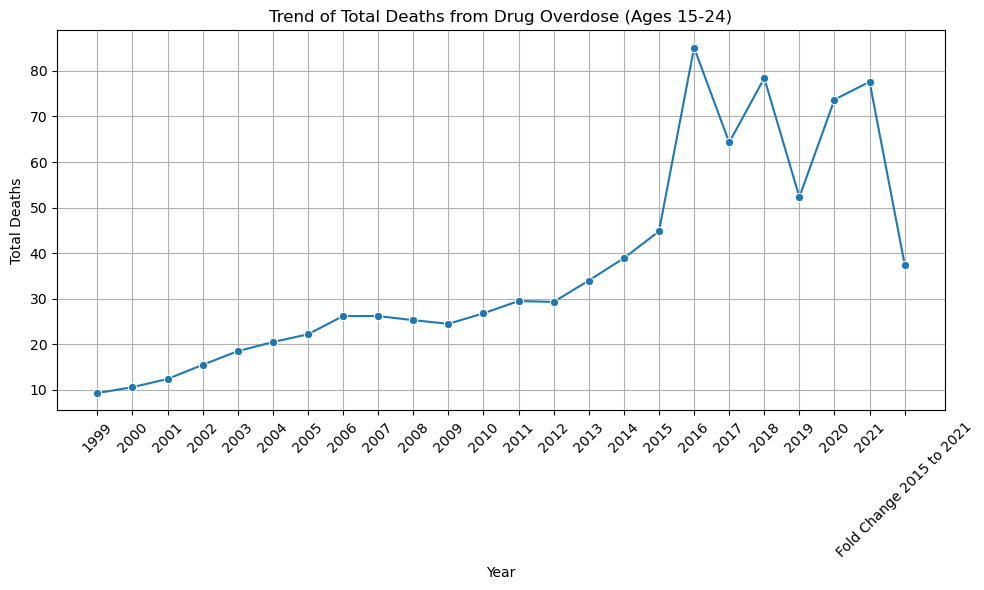

In [66]:
yearly_totals = aggregated_data.groupby('Year')['Total Deaths'].sum().reset_index()

# Convert 'Year' to a string type if it's not already, to ensure it's treated as a categorical variable
yearly_totals['Year'] = yearly_totals['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_totals, x='Year', y='Total Deaths', marker='o')

plt.title('Trend of Total Deaths from Drug Overdose (Ages 15-24)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

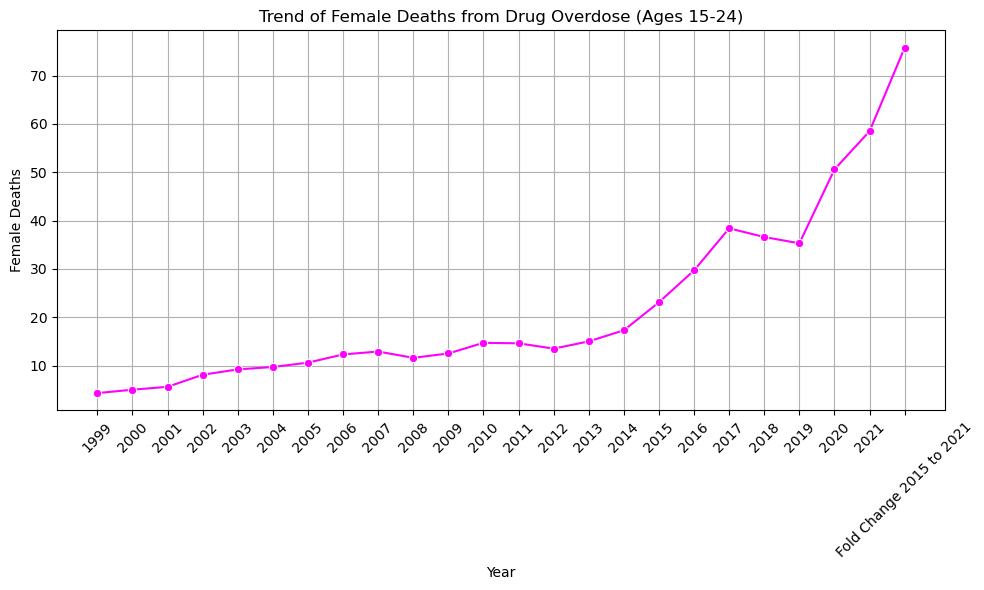

In [67]:
yearly_female_deaths = aggregated_data.groupby('Year')['Female Deaths'].sum().reset_index()

# Convert 'Year' to a string type if it's not already, to ensure it's treated as a categorical variable
yearly_female_deaths['Year'] = yearly_female_deaths['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_female_deaths, x='Year', y='Female Deaths', marker='o', color='magenta')

plt.title('Trend of Female Deaths from Drug Overdose (Ages 15-24)')
plt.xlabel('Year')
plt.ylabel('Female Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

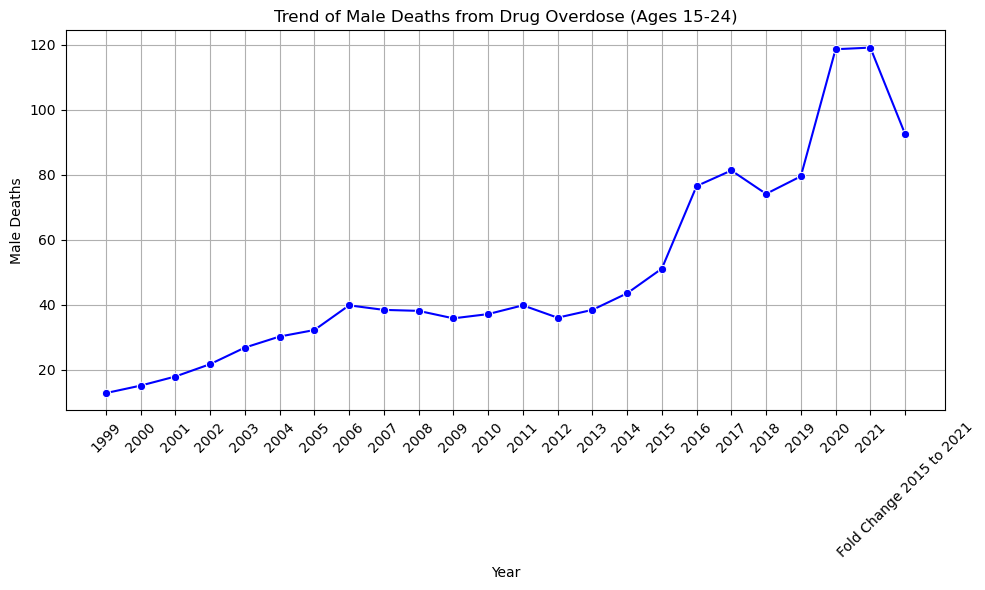

In [68]:
yearly_male_deaths = aggregated_data.groupby('Year')['Male Deaths'].sum().reset_index()

# Convert 'Year' to a string type if it's not already, to ensure it's treated as a categorical variable
yearly_male_deaths['Year'] = yearly_male_deaths['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_male_deaths, x='Year', y='Male Deaths', marker='o', color='blue')

plt.title('Trend of Male Deaths from Drug Overdose (Ages 15-24)')
plt.xlabel('Year')
plt.ylabel('Male Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

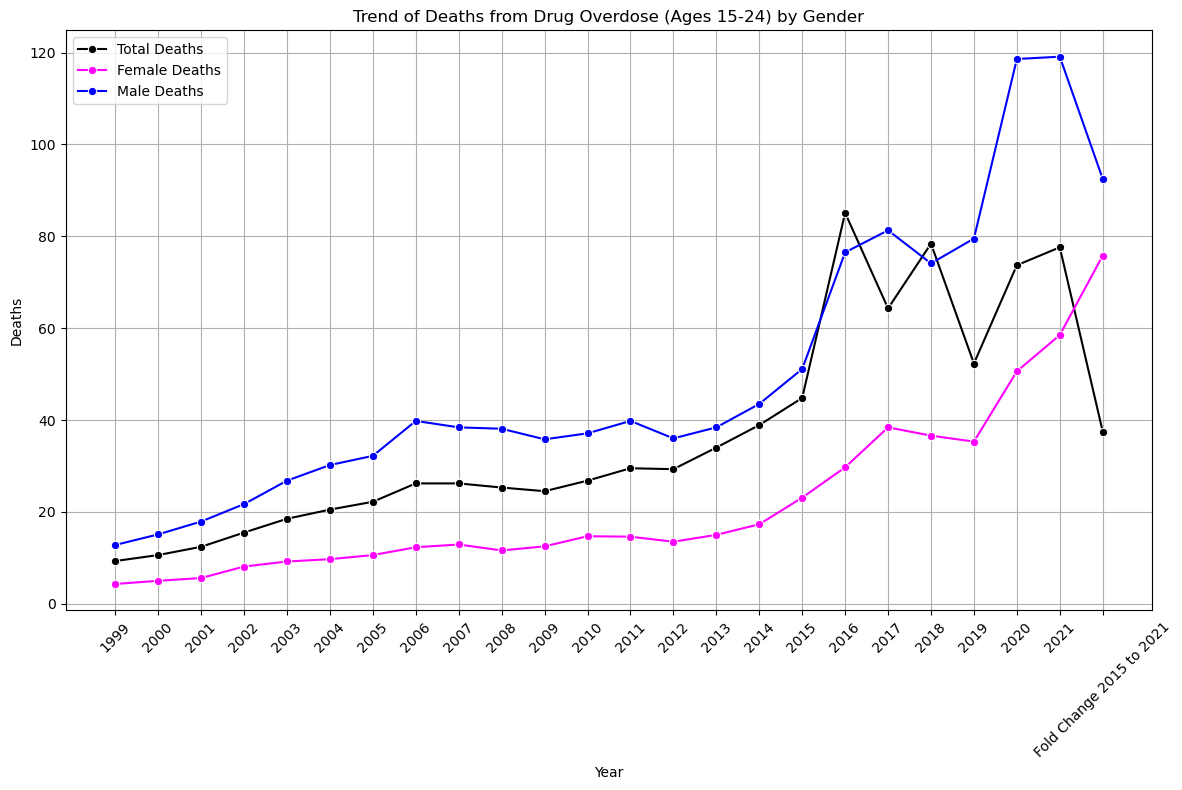

In [69]:
yearly_totals = aggregated_data.groupby('Year')['Total Deaths'].sum().reset_index()
yearly_female_deaths = aggregated_data.groupby('Year')['Female Deaths'].sum().reset_index()
yearly_male_deaths = aggregated_data.groupby('Year')['Male Deaths'].sum().reset_index()

# Convert 'Year' to string to ensure it's treated as a categorical variable
yearly_totals['Year'] = yearly_totals['Year'].astype(str)
yearly_female_deaths['Year'] = yearly_female_deaths['Year'].astype(str)
yearly_male_deaths['Year'] = yearly_male_deaths['Year'].astype(str)

# Now, let's create the plot
plt.figure(figsize=(12, 8))

# Plot total deaths
sns.lineplot(data=yearly_totals, x='Year', y='Total Deaths', marker='o', color='black', label='Total Deaths')

# Plot female deaths
sns.lineplot(data=yearly_female_deaths, x='Year', y='Female Deaths', marker='o', color='magenta', label='Female Deaths')

# Plot male deaths
sns.lineplot(data=yearly_male_deaths, x='Year', y='Male Deaths', marker='o', color='blue', label='Male Deaths')

plt.title('Trend of Deaths from Drug Overdose (Ages 15-24) by Gender')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

# Show the plot
plt.show()


### Clustering and Demographics ###

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

Here we import the demographic sheet of the dataset, rename its columns and display it pretty (we drop native.. and asian.. because we don't have the required data for these categories)

In [71]:
# Assuming demo_df is already loaded and demo_df_long is created as before
demo_df = pd.read_excel("Count_by_demo.xlsx")

# Identify the index of the first occurrence of "Any Opioid1" or similar categories
end_index = demo_df[demo_df['Year'].str.contains("Any Opioid", na=False)].index.min()

# Filter the DataFrame to keep only rows before the identified index, ensuring we only have total deaths
demo_df_filtered = demo_df.loc[:end_index-1].copy()

positions_to_drop = range(9, 15)  # This will drop rows 9, 10, 11, 12, 13, and 14
df_dropped = demo_df_filtered.drop(demo_df_filtered.iloc[positions_to_drop].index).reset_index(drop=True)

# Convert the filtered dataset to a long format
demo_df_long_filtered = pd.melt(df_dropped, id_vars=['Year'], var_name='Year_Num', value_name='Death_Count')

# Filter out rows for 'Fold Change 2015 to 2021' and ensure 'Year_Num' is numeric, handling warnings properly
demo_df_long_filtered = demo_df_long_filtered[demo_df_long_filtered['Year_Num'].apply(lambda x: str(x).isnumeric())].copy()
demo_df_long_filtered['Year_Num'] = demo_df_long_filtered['Year_Num'].astype(int)

# Convert 'Death_Count' to numeric, handling non-numeric values properly
demo_df_long_filtered['Death_Count'] = pd.to_numeric(demo_df_long_filtered['Death_Count'], errors='coerce')
demo_df_long_filtered.dropna(subset=['Death_Count'], inplace=True)

demo_df_long_filtered.rename(columns={'Year': 'Demographic Characteristic', 'Year_Num': 'Year'}, inplace=True)

print(demo_df_long_filtered)

                            Demographic Characteristic  Year  Death_Count
0                                Total Overdose Deaths  1999          6.1
1                                               Female  1999          3.9
2                                                 Male  1999          8.2
3                                 White (Non-Hispanic)  1999          6.2
4                                               Female  1999          4.3
..                                                 ...   ...          ...
340                                             Female  2021          9.4
341                                               Male  2021         32.4
342    American Indian or Alaska Native (Non-Hispanic)  2021         56.5
343                                             Female  2021         44.1
344                                               Male  2021         69.3

[344 rows x 3 columns]


Then, we create another data frame in which we only keep the rows with indexes = multipliers of 3 (the ethnicity)

In [72]:
ethnicity_df = demo_df_long_filtered.loc[demo_df_long_filtered.index % 3 == 0].reset_index(drop=True)
display(ethnicity_df)

,Demographic Characteristic,Year,Death_Count
0,Total Overdose Deaths,1999,6.1
1,White (Non-Hispanic),1999,6.2
2,Black (Non-Hispanic),1999,7.5
3,Hispanic,1999,5.4
4,American Indian or Alaska Native (Non-Hispanic),1999,6.0
...,...,...,...
109,Total Overdose Deaths,2021,32.4
110,White (Non-Hispanic),2021,36.8
111,Black (Non-Hispanic),2021,44.2
112,Hispanic,2021,21.1


Now we clean the DF again and only display specific values, not the total overdose deaths of that year by dropping every row that has the keyword "total" in it.

In [73]:
ethnicity_df_cleaned = ethnicity_df[~ethnicity_df['Demographic Characteristic'].str.contains('total', case=False)].reset_index(drop=True)

# Display the first few rows of the cleaned dataframe
display(ethnicity_df_cleaned)

,Demographic Characteristic,Year,Death_Count
0,White (Non-Hispanic),1999,6.2
1,Black (Non-Hispanic),1999,7.5
2,Hispanic,1999,5.4
3,American Indian or Alaska Native (Non-Hispanic),1999,6.0
4,White (Non-Hispanic),2000,6.6
...,...,...,...
86,American Indian or Alaska Native (Non-Hispanic),2020,42.5
87,White (Non-Hispanic),2021,36.8
88,Black (Non-Hispanic),2021,44.2
89,Hispanic,2021,21.1


We create a list with the demographic characteristics at the rows which are multipliers of 3, so we can later append them as a prefix to subcategories Male and Female, so as not to lose the logic of the table

In [74]:
values_at_multiples_of_three = []  # Initialize an empty list to store the values

# Iterate over the DataFrame index
for index in demo_df_long_filtered.index:
    if index % 3 == 0:  # Check if the index is a multiple of 3
        # Append the 'Demographic Characteristic' value at this index to the list
        values_at_multiples_of_three.append(demo_df_long_filtered.loc[index, 'Demographic Characteristic'])
        
cleaned_values_at_multiples_of_three = [re.sub(r'\xa0', ' ', value).strip() for value in values_at_multiples_of_three]
print(cleaned_values_at_multiples_of_three)

['Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (Non-Hispanic)', 'Hispanic', 'American Indian or Alaska Native (Non-Hispanic)', 'Total Overdose Deaths', 'White (Non-Hispanic)', 'Black (No

Appending and visualising final table:

In [75]:
pointer_list = 0
for index in demo_df_long_filtered.index:
    if index % 3 == 1:  # Rows 1, 4, 7, etc.
        demo_df_long_filtered.at[index, 'Demographic Characteristic'] = cleaned_values_at_multiples_of_three[pointer_list] + ' ' + demo_df_long_filtered.at[index, 'Demographic Characteristic']
    elif index % 3 == 2:  # Rows 2, 5, 8, etc.
        demo_df_long_filtered.at[index, 'Demographic Characteristic'] = cleaned_values_at_multiples_of_three[pointer_list] + ' ' + demo_df_long_filtered.at[index, 'Demographic Characteristic']
        pointer_list += 1
    if pointer_list >= len(cleaned_values_at_multiples_of_three):
        break  # Exit the loop if there are no more characteristics to append.

demo_df_long_filtered = demo_df_long_filtered[demo_df_long_filtered.index % 3 != 0].reset_index(drop=True)

# Display the first few rows to verify
print(demo_df_long_filtered)


                            Demographic Characteristic  Year  Death_Count
0                       Total Overdose Deaths   Female  1999          3.9
1                         Total Overdose Deaths   Male  1999          8.2
2                    White (Non-Hispanic)       Female  1999          4.3
3                      White (Non-Hispanic)       Male  1999          8.0
4                    Black (Non-Hispanic)       Female  1999          4.0
..                                                 ...   ...          ...
225                                Hispanic       Male  2021         67.3
226  American Indian or Alaska Native (Non-Hispanic...  2021          9.4
227  American Indian or Alaska Native (Non-Hispanic...  2021         32.4
228                                             Female  2021         44.1
229                                               Male  2021         69.3

[230 rows x 3 columns]


Do the same cleaning process for the gender data frame

In [76]:
gender_df_cleaned = demo_df_long_filtered[~demo_df_long_filtered['Demographic Characteristic'].str.contains('total', case=False)].reset_index(drop=True)
display(gender_df_cleaned)

,Demographic Characteristic,Year,Death_Count
0,White (Non-Hispanic) Female,1999,4.3
1,White (Non-Hispanic) Male,1999,8.0
2,Black (Non-Hispanic) Female,1999,4.0
3,Black (Non-Hispanic) Male,1999,11.5
4,Hispanic Female,1999,2.2
...,...,...,...
179,Hispanic Male,2021,67.3
180,American Indian or Alaska Native (Non-Hispanic...,2021,9.4
181,American Indian or Alaska Native (Non-Hispanic...,2021,32.4
182,Female,2021,44.1


Plot the elbow method to find the optimal k value

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from

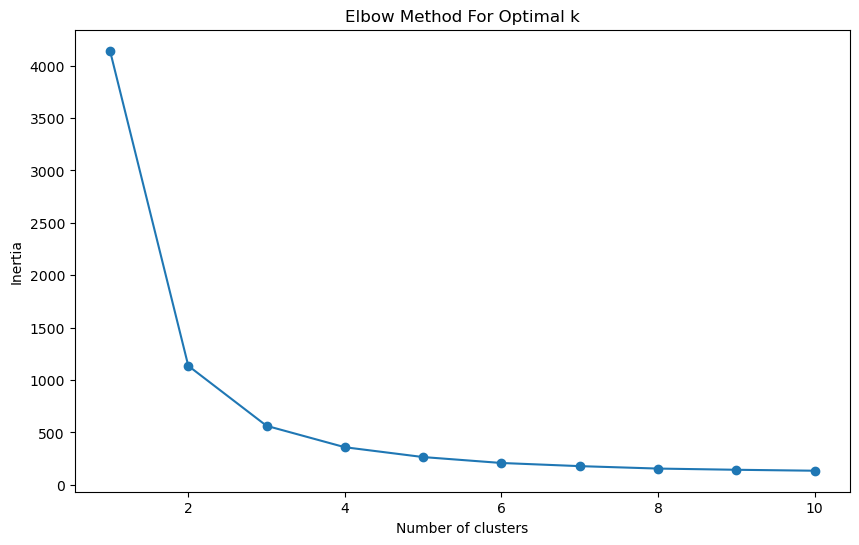

In [77]:
# Step 1: Preprocessing the Data
# One-hot encode the 'Demographic Characteristic' column
onehot_encoder = OneHotEncoder(sparse=False)
demographic_encoded = onehot_encoder.fit_transform(ethnicity_df_cleaned[['Demographic Characteristic']])

# Scale the 'Death_Count' column
scaler = StandardScaler()
death_count_scaled = scaler.fit_transform(ethnicity_df_cleaned[['Death_Count']])

# No need to scale the 'Year' column as it's already in a numerical format and we're treating it as a continuous variable.

# Combine the encoded demographics and the scaled death counts into one dataframe for clustering
X_clustering = pd.concat([
    pd.DataFrame(demographic_encoded, columns=onehot_encoder.get_feature_names_out()),
    pd.DataFrame(death_count_scaled, columns=['Death_Count']),
    ethnicity_df_cleaned['Year']  # Adding the year as a numerical feature
], axis=1)

# Step 2: Determine the Number of Clusters
# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


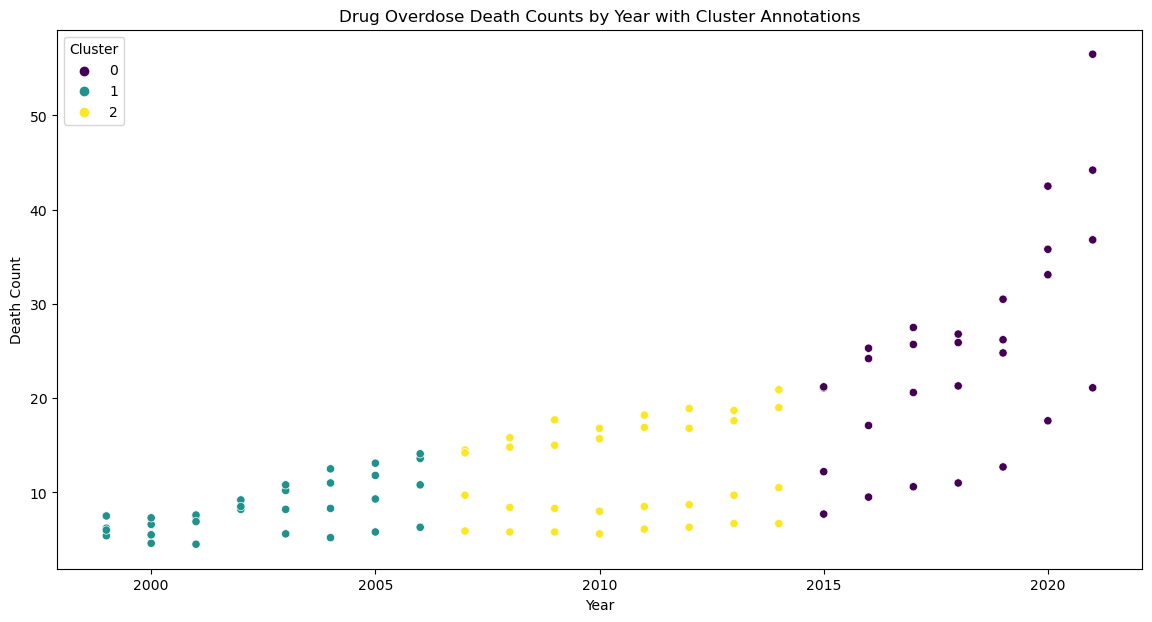

In [78]:
# Performing K-Means clustering with 3 clusters based on the elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
ethnicity_df_cleaned['Cluster'] = kmeans.fit_predict(X_clustering)

# Adding the cluster labels to the original dataframe for interpretation
ethnicity_df_cleaned['Cluster'] = kmeans.labels_

# Visualizing the clusters with respect to the original features
# Since we have encoded categorical features, direct visualization is not straightforward.
# We will use the Year and Death_Count for visualization and annotate the points with the cluster number.

plt.figure(figsize=(14, 7))
sns.scatterplot(data=ethnicity_df_cleaned, x='Year', y='Death_Count', hue='Cluster', palette='viridis')
plt.title('Drug Overdose Death Counts by Year with Cluster Annotations')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Cluster')
plt.show()

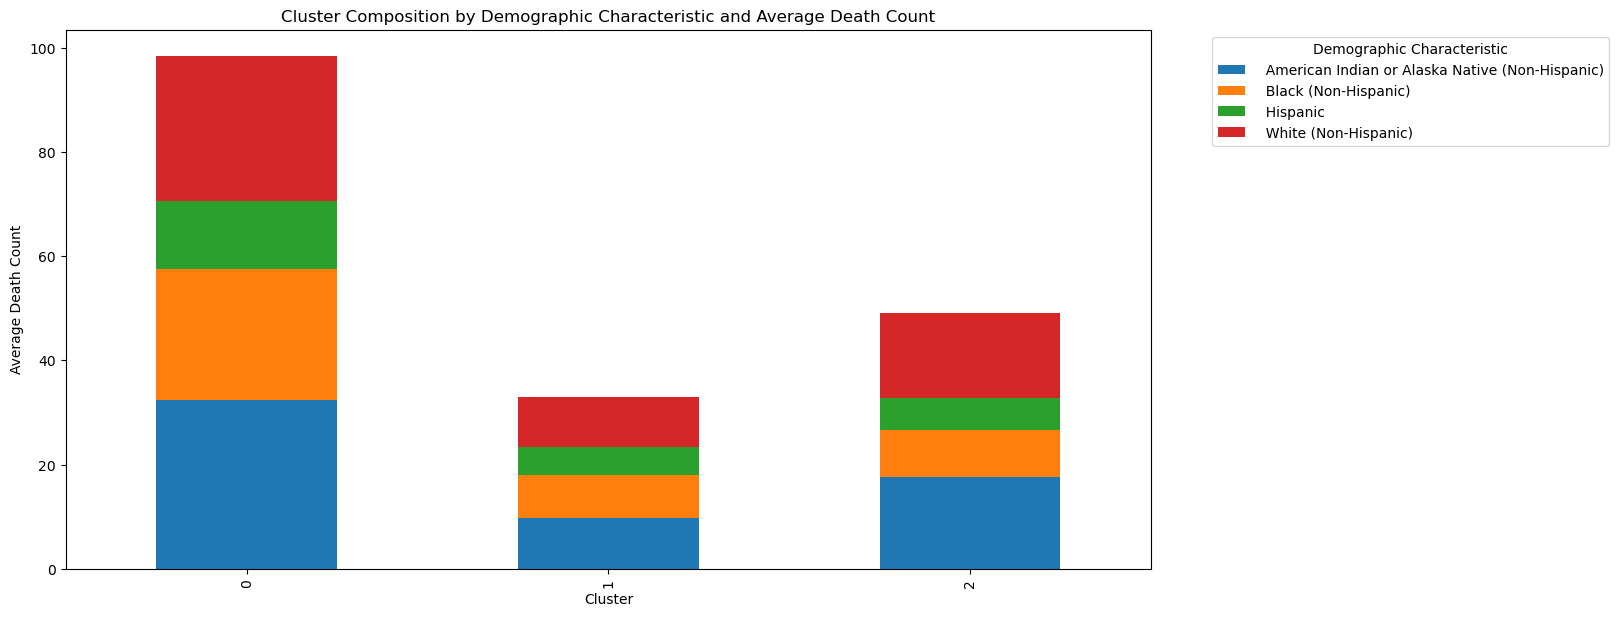

In [79]:
# Composition of the clusters.
# This involves aggregating the data by cluster and demographic characteristic.
cluster_composition = ethnicity_df_cleaned.groupby(['Cluster', 'Demographic Characteristic'])['Death_Count'].mean().unstack(fill_value=0)
cluster_composition.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Cluster Composition by Demographic Characteristic and Average Death Count')
plt.xlabel('Cluster')
plt.ylabel('Average Death Count')
plt.legend(title='Demographic Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

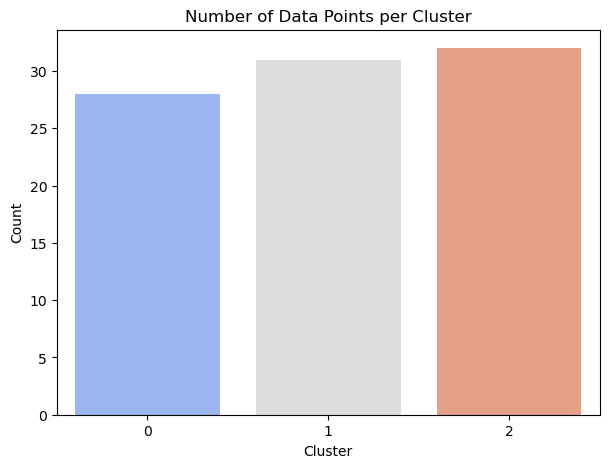

In [80]:
# We can also look at the number of data points per cluster
plt.figure(figsize=(7, 5))
sns.countplot(x='Cluster', data=ethnicity_df_cleaned, palette='coolwarm')
plt.title('Number of Data Points per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


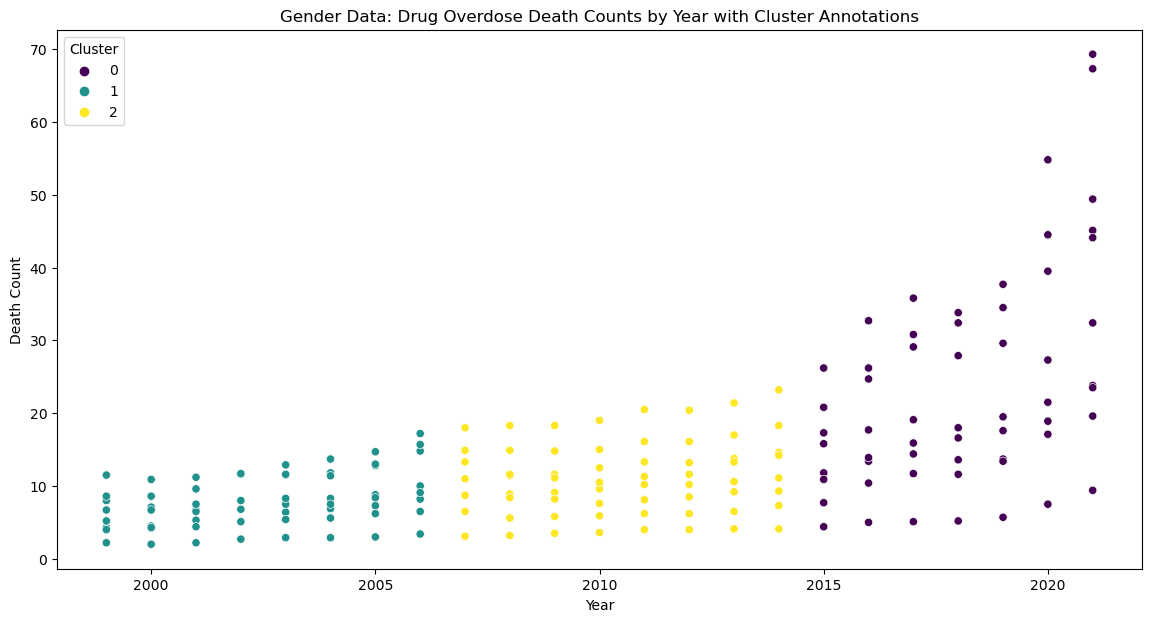

In [81]:
# Preprocessing the Gender Data
# One-hot encode the 'Demographic Characteristic' column with a focus on Male/Female
# Using a custom transformer to extract gender from the demographic characteristic
def extract_gender(demographics):
    return pd.Series(demographics).str.contains('Male').astype(int).replace({0: 'Female', 1: 'Male'})

gender_encoded = extract_gender(gender_df_cleaned['Demographic Characteristic'])

# OneHotEncoding the gender
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(gender_encoded.values.reshape(-1, 1))

# Standardize the 'Death_Count' feature
death_count_scaled = scaler.fit_transform(gender_df_cleaned[['Death_Count']])

# Combine the encoded gender and the scaled death counts into one dataframe for clustering
X_clustering_gender = pd.concat([
    pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out()),
    pd.DataFrame(death_count_scaled, columns=['Death_Count']),
    gender_df_cleaned['Year']  # Adding the year as a numerical feature
], axis=1)

# Applying K-Means clustering with 3 clusters
kmeans_gender = KMeans(n_clusters=3, random_state=42)
gender_df_cleaned['Cluster'] = kmeans_gender.fit_predict(X_clustering_gender)

# Visualization of clusters
# Scatter plot of Death_Count by Year, colored by clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(data=gender_df_cleaned, x='Year', y='Death_Count', hue='Cluster', palette='viridis')
plt.title('Gender Data: Drug Overdose Death Counts by Year with Cluster Annotations')
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.legend(title='Cluster')
plt.show()

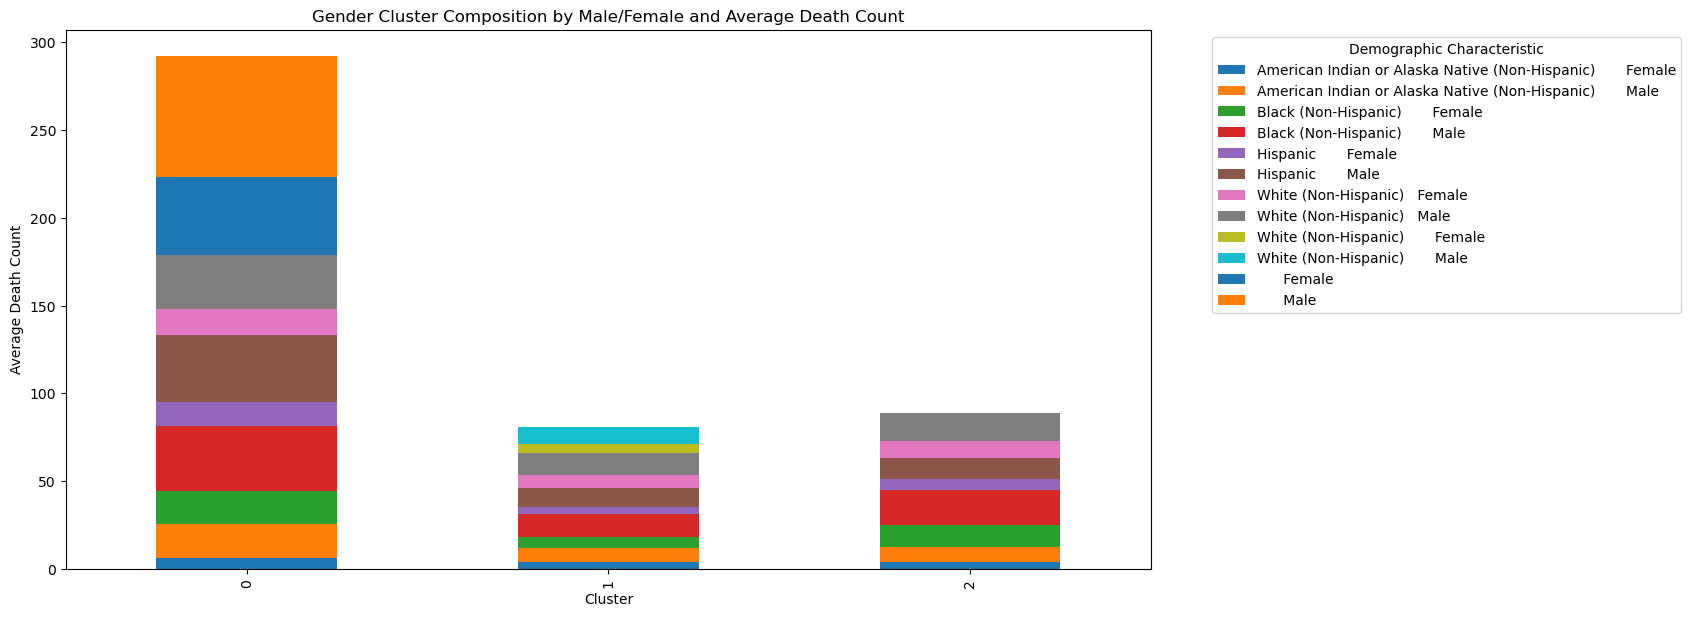

In [82]:
# Stacked bar chart for gender composition within each cluster
cluster_composition_gender = gender_df_cleaned.groupby(['Cluster', 'Demographic Characteristic'])['Death_Count'].mean().unstack(fill_value=0)
cluster_composition_gender = cluster_composition_gender.loc[:, cluster_composition_gender.columns.str.contains('Male|Female')]
cluster_composition_gender.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Gender Cluster Composition by Male/Female and Average Death Count')
plt.xlabel('Cluster')
plt.ylabel('Average Death Count')
plt.legend(title='Demographic Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

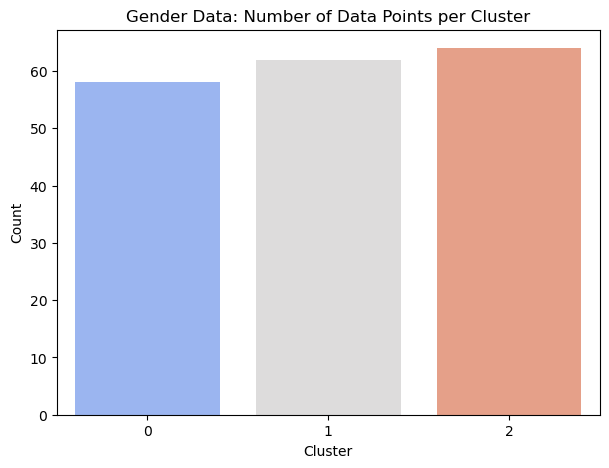

In [83]:
# Count of data points per cluster
plt.figure(figsize=(7, 5))
sns.countplot(x='Cluster', data=gender_df_cleaned, palette='coolwarm')
plt.title('Gender Data: Number of Data Points per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()